In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Dictionary

- "Pregnancies": Number of times pregnant (float64)
- "Glucose": Plasma glucose concentration a 2 hours in an oral glucose tolerance test (float64)
- "BloodPressure": Diastolic blood pressure (mm Hg) (float64)
- "SkinThickness": Triceps skin fold thickness (mm) (float64)
- "Insulin": 2-Hour serum insulin (mu U/ml) (float64)
- "BMI": Body mass index (weight in kg/(height in m)^2) (float64)
- "DiabetesPedigreeFunction": Diabetes pedigree function (float64)
- "Age": Age (years) (float64)
- "Outcome": Class variable (0 or 1) indicating whether the person has diabetes (int64)

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- 0 --> Non Diabetes
- 1 --> Diabetes

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


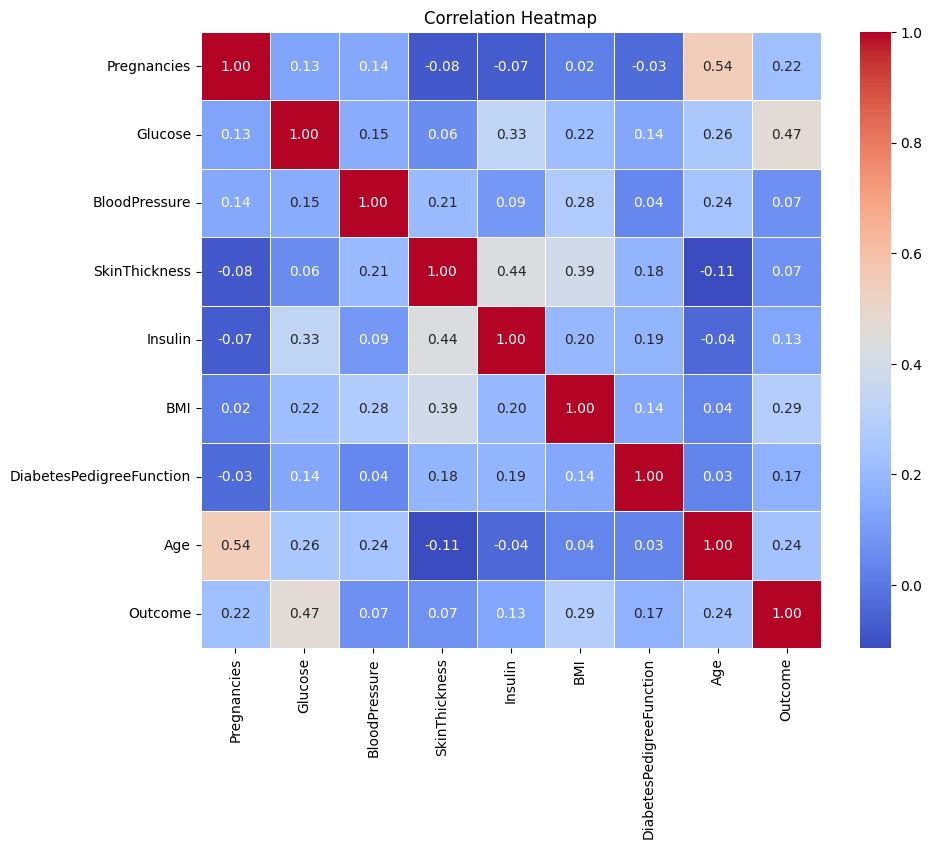

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Save the heatmap with high resolution as png
plt.savefig("correlation_heatmap.png", dpi=300)

# Display the heatmap
plt.show()

In [11]:
# Normalize continuous variables using StandardScaler
from sklearn.preprocessing import StandardScaler

# Select the continuous variables to normalize
continuous_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the continuous variables
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prediction

In [14]:
# Install LazyPredict
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
# Import LazyPredict
from lazypredict.Supervised import LazyClassifier

# Create a LazyClassifier object
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier on the training data
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

# Display the models and their performance metrics
models

100%|██████████| 29/29 [00:01<00:00, 24.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.78,0.76,0.76,0.78,0.01
GaussianNB,0.77,0.75,0.75,0.77,0.01
RidgeClassifierCV,0.77,0.75,0.75,0.77,0.01
DecisionTreeClassifier,0.75,0.74,0.74,0.75,0.01
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.01
RidgeClassifier,0.76,0.74,0.74,0.76,0.01
LinearSVC,0.75,0.74,0.74,0.75,0.08
LogisticRegression,0.75,0.74,0.74,0.75,0.01
CalibratedClassifierCV,0.75,0.73,0.73,0.75,0.11


- QuadraticDiscriminantAnalysis (Accuracy = 0.779)
- GaussianNB and RidgeClassifierCV (Accuracy = 0.766)
- DecisionTreeClassifier (Accuracy = 0.746)

In [10]:
input_data = (5,166,72,19,175,25.8,0.587,51)

In [16]:
# Perform QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a QuadraticDiscriminantAnalysis object
qda = QuadraticDiscriminantAnalysis()

# Fit the model on the training data
qda.fit(X_train, y_train)

# Make predictions on the test data
qda_predictions = qda.predict(X_test)

# Evaluate the model
qda_accuracy = qda.score(X_test, y_test)
qda_accuracy

0.7792207792207793

In [19]:
# Create a QuadraticDiscriminantAnalysis object
qda = QuadraticDiscriminantAnalysis()

# Fit the model on the training data
qda.fit(X_train, y_train)

# Reshape the input data as we are predicting for one instance
input_data_reshaped = np.asarray(input_data).reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Make prediction using the QuadraticDiscriminantAnalysis model
prediction = qda.predict(std_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic


In [20]:
# Perform RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV

# Create a RidgeClassifierCV object
ridge_cv = RidgeClassifierCV()

# Fit the model on the training data
ridge_cv.fit(X_train, y_train)

# Make predictions on the test data
ridge_cv_predictions = ridge_cv.predict(X_test)

# Evaluate the model
ridge_cv_accuracy = ridge_cv.score(X_test, y_test)
ridge_cv_accuracy

0.7662337662337663

In [21]:
# Create a RidgeClassifierCV object
ridge_cv = RidgeClassifierCV()

# Fit the model on the training data
ridge_cv.fit(X_train, y_train)

# Reshape the input data as we are predicting for one instance
input_data_reshaped = np.asarray(input_data).reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Make prediction using the RidgeClassifierCV model
prediction = ridge_cv.predict(std_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic


In [22]:
# Perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier()

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = dt_classifier.score(X_test, y_test)
dt_accuracy

0.7727272727272727

In [24]:
# Reshape the input data as we are predicting for one instance
input_data_reshaped = np.asarray(input_data).reshape(1, -1)

# Make prediction using the DecisionTreeClassifier model
prediction = dt_classifier.predict(input_data_reshaped)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic
